<a href="https://colab.research.google.com/github/Tar199/Tarun_64061/blob/main/Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!kaggle datasets list


Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 4, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.12/dist-packages/kaggle/__init__.py", line 6, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.12/dist-packages/kaggle/api/kaggle_api_extended.py", line 434, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.config/kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/


In [ ]:
!pip install -q kaggle
from google.colab import files

print("Upload your kaggle.json file:")
uploaded = files.upload()


!mkdir -p ~/.kaggle
!cp kaggle_.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

print("Kaggle API key setup complete!")


Upload your kaggle.json file:


Saving kaggle_.json to kaggle_.json
Kaggle API key setup complete!


In [ ]:
!kaggle datasets download -d shaunthesheep/microsoft-catsvsdogs-dataset -p /tmp --unzip

Dataset URL: https://www.kaggle.com/datasets/shaunthesheep/microsoft-catsvsdogs-dataset
License(s): other
 83% 656M/788M [00:00<00:00, 1.66GB/s]
100% 788M/788M [00:00<00:00, 1.42GB/s]


In [ ]:
!pip install -q opencv-python
!pip install -q tensorflow

In [ ]:
from PIL import Image
import cv2
import os
import numpy as np
import shutil
import pathlib

# Dataset paths
cat_source = '/tmp/PetImages/Cat'
dog_source = '/tmp/PetImages/Dog'

cat_files = [os.path.join(cat_source, f) for f in os.listdir(cat_source)
             if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
dog_files = [os.path.join(dog_source, f) for f in os.listdir(dog_source)
             if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

print(f"Found {len(cat_files)} cat images and {len(dog_files)} dog images")

def is_valid_cv_image(filepath):
    try:
        img = cv2.imread(filepath)
        if img is None:
            return False
        h, w, c = img.shape
        if c != 3 or h < 50 or w < 50:
            return False
        return True
    except:
        return False

valid_cat_files = [f for f in cat_files if is_valid_cv_image(f)]
valid_dog_files = [f for f in dog_files if is_valid_cv_image(f)]

print(f"Valid images - Cats: {len(valid_cat_files)}, Dogs: {len(valid_dog_files)}")
print(f"Removed corrupted images: {(len(cat_files)+len(dog_files))-(len(valid_cat_files)+len(valid_dog_files))}")

def fix_image(filepath):
    try:
        img = Image.open(filepath).convert('RGB')
        img.save(filepath, 'JPEG')
        return True
    except:
        os.remove(filepath)
        return False

for f in valid_cat_files + valid_dog_files:
    fix_image(f)

base_dir = '/tmp/organized_dataset'
if os.path.exists(base_dir):
    shutil.rmtree(base_dir)
os.makedirs(base_dir, exist_ok=True)

for split in ['training', 'validation']:
    for category in ['cats', 'dogs']:
        os.makedirs(os.path.join(base_dir, split, category), exist_ok=True)

np.random.seed(42)
np.random.shuffle(valid_cat_files)
np.random.shuffle(valid_dog_files)

# 90% training, 10% validation
cat_training = valid_cat_files[:int(len(valid_cat_files)*0.9)]
cat_val = valid_cat_files[int(len(valid_cat_files)*0.9):]
dog_training = valid_dog_files[:int(len(valid_dog_files)*0.9)]
dog_val = valid_dog_files[int(len(valid_dog_files)*0.9):]

for src_list, split, category in [
    (cat_training, 'training', 'cats'), (cat_val, 'validation', 'cats'),
    (dog_training, 'training', 'dogs'), (dog_val, 'validation', 'dogs')
]:
    for src in src_list:
        dst = os.path.join(base_dir, split, category, os.path.basename(src))
        try:
            shutil.copy(src, dst)
        except:
            pass

print(f"Training images: {len(cat_training)+len(dog_training)}")
print(f"Validation images: {len(cat_val)+len(dog_val)}")

# Remove non-image files
def remove_non_images(directory):
    valid_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.gif')
    removed = 0
    for path in pathlib.Path(directory).rglob('*'):
        if path.is_file() and path.suffix.lower() not in valid_extensions:
            print(f"Removing non-image file: {path}")
            path.unlink()
            removed += 1
    print(f"Removed {removed} non-image files from {directory}\n")

remove_non_images(base_dir)

from PIL import Image

for split in ['training', 'validation']:
    for category in ['cats', 'dogs']:
        folder = os.path.join(base_dir, split, category)
        for fname in os.listdir(folder):
            fpath = os.path.join(folder, fname)
            try:
                img = Image.open(fpath)
                img.verify()
            except:
                print("invalid:", fpath)

Found 12500 cat images and 12500 dog images
Valid images - Cats: 12491, Dogs: 12491
Removed corrupted images: 18


/usr/local/lib/python3.12/dist-packages/PIL/TiffImagePlugin.py:950: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Training images: 22482
Validation images: 2500
Removed 0 non-image files from /tmp/organized_dataset



Experiment 1 - FROM SCRATCH WITH 1,000 SAMPLES

Dataset created: 1000 training, 500 val, 500 test
Found 1000 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 18, 18, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        12,545 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 991,041 (3.78 MB)

 Trainable params: 991,041 (3.78 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step - accuracy: 0.4853 - loss: 0.7080 - val_accuracy: 0.5000 - val_loss: 0.6976
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.5068 - loss: 0.6956 - val_accuracy: 0.5000 - val_loss: 0.7165
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.4790 - loss: 0.6979 - val_accuracy: 0.5000 - val_loss: 0.6929
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.5107 - loss: 0.6937 - val_accuracy: 0.5000 - val_loss: 0.6925
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.5163 - loss: 0.6925 - val_accuracy: 0.5240 - val_loss: 0.6927
Epoch 6/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.5174 - loss: 0.6930 - val_accuracy: 0.5480 - val_loss: 0.6877
Epoch 7/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.5347 - loss: 0.6925 - val_accuracy: 0.6360 - val_loss: 0.6807
Epoch 8/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.5311 - loss: 0.6877 - val_accuracy: 0.5640 - v

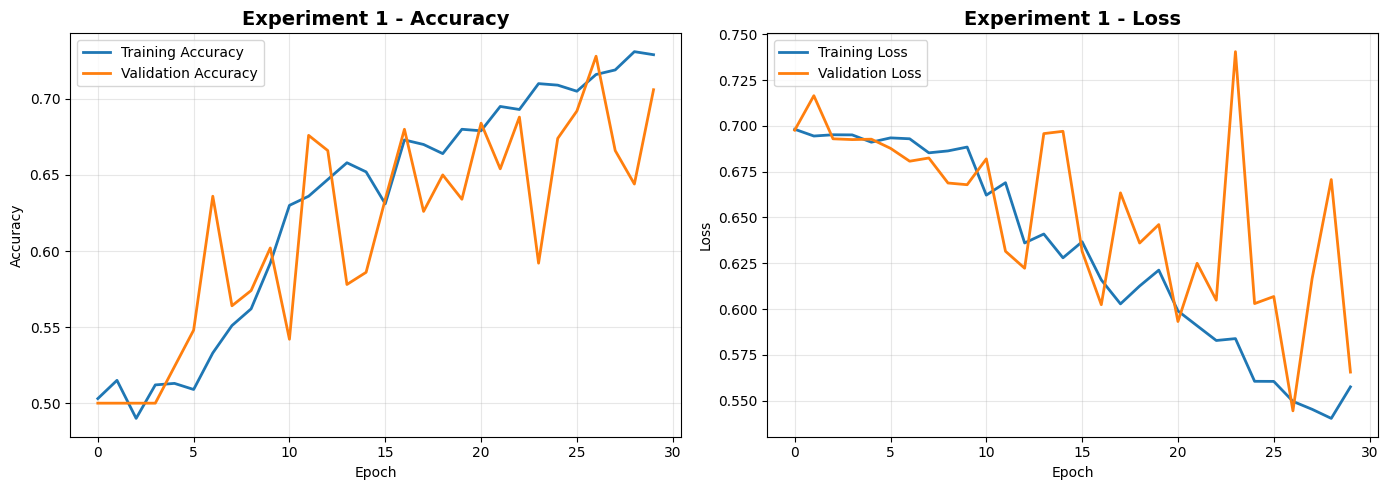

In [ ]:
# Store results
results = []

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

training_size = 1000
val_size = 500
test_size = 500
subset_dir = '/tmp/subset_1000_scratch'

if os.path.exists(subset_dir):
    shutil.rmtree(subset_dir)

for split in ['training', 'validation', 'test']:
    for category in ['cats', 'dogs']:
        os.makedirs(os.path.join(subset_dir, split, category), exist_ok=True)

for category in ['cats', 'dogs']:
    training_source = os.path.join(base_dir, 'training', category)
    all_training_files = os.listdir(training_source)
    np.random.shuffle(all_training_files)

    files_per_category_training = training_size // 2
    files_per_category_test = test_size // 2
    files_per_category_val = val_size // 2

    training_files = all_training_files[:files_per_category_training]
    test_files = all_training_files[files_per_category_training:files_per_category_training + files_per_category_test]

    val_source = os.path.join(base_dir, 'validation', category)
    val_files = os.listdir(val_source)[:files_per_category_val]

    for fname in training_files:
        shutil.copy(os.path.join(training_source, fname),
                   os.path.join(subset_dir, 'training', category, fname))

    for fname in test_files:
        shutil.copy(os.path.join(training_source, fname),
                   os.path.join(subset_dir, 'test', category, fname))

    for fname in val_files:
        shutil.copy(os.path.join(val_source, fname),
                   os.path.join(subset_dir, 'validation', category, fname))

print(f"Dataset created: {training_size} training, {val_size} val, {test_size} test")

training_dataset = tf.keras.utils.image_dataset_from_directory(
    os.path.join(subset_dir, 'training'),
    image_size=(180, 180),
    batch_size=32,
    label_mode='binary'
)

val_dataset = tf.keras.utils.image_dataset_from_directory(
    os.path.join(subset_dir, 'validation'),
    image_size=(180, 180),
    batch_size=32,
    label_mode='binary'
)

test_dataset = tf.keras.utils.image_dataset_from_directory(
    os.path.join(subset_dir, 'test'),
    image_size=(180, 180),
    batch_size=32,
    label_mode='binary',
    shuffle=False
)

data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2),
])

model = models.Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(180, 180, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.build(input_shape=(None, 180, 180, 3))
model.summary()

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

history = model.fit(
    training_dataset,
    epochs=30,
    validation_data=val_dataset,
    callbacks=[early_stopping],
    verbose=1
)

test_loss, test_acc = model.evaluate(test_dataset)
print(f"Experiment 1 RESULTS:")
print(f"Test Accuracy: {test_acc:.4f} ({test_acc*100:.2f}%)")
print(f"Test Loss: {test_loss:.4f}")



results.append({
    'experiment': 'Experiment 1: From Scratch - 1,000 samples',
    'training_size': 1000,
    'model_type': 'scratch',
    'test_accuracy': test_acc,
    'test_loss': test_loss,
    'final_val_accuracy': history.history['val_accuracy'][-1],
    'best_val_accuracy': max(history.history['val_accuracy']),
    'epochs_trained': len(history.history['accuracy'])
})


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
ax1.set_title('Experiment 1 - Accuracy', fontsize=14, fontweight='bold')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()
ax1.grid(True, alpha=0.3)

ax2.plot(history.history['loss'], label='Training Loss', linewidth=2)
ax2.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
ax2.set_title('Experiment 1 - Loss', fontsize=14, fontweight='bold')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Experiment 2 - FROM SCRATCH WITH 10,000 SAMPLES

Dataset created: 10000 training, 500 val, 500 test
Found 10000 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_2 (Sequential)       │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_1 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 18, 18, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 7, 7, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │        12,545 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 991,041 (3.78 MB)

 Trainable params: 991,041 (3.78 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 38ms/step - accuracy: 0.5169 - loss: 0.7907 - val_accuracy: 0.6000 - val_loss: 0.6809
Epoch 2/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.5982 - loss: 0.6749 - val_accuracy: 0.6820 - val_loss: 0.6095
Epoch 3/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.6613 - loss: 0.6175 - val_accuracy: 0.6700 - val_loss: 0.5994
Epoch 4/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.6950 - loss: 0.5866 - val_accuracy: 0.7260 - val_loss: 0.5356
Epoch 5/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7194 - loss: 0.5466 - val_accuracy: 0.7700 - val_loss: 0.4956
Epoch 6/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step - accuracy: 0.7550 - loss: 0.5023 - val_accuracy: 0.7560 - val_loss: 0.4879
Epoch 7/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step - accuracy: 0.7786 - loss: 0.4690 - val_accuracy: 0.7960 - val_loss: 0.4322
Epoch 8/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 37ms/step - accuracy: 0.7911 - loss: 0.4548 - 

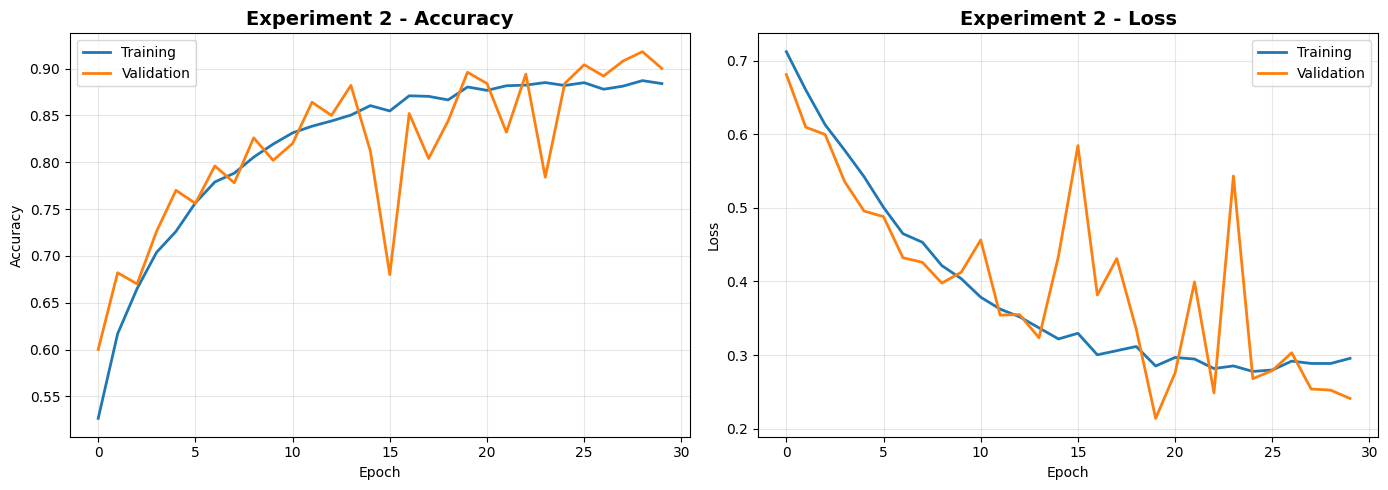

In [ ]:
training_size = 10000
val_size = 500
test_size = 500
subset_dir = '/tmp/subset_10000_scratch'

if os.path.exists(subset_dir):
    shutil.rmtree(subset_dir)

for split in ['training', 'validation', 'test']:
    for category in ['cats', 'dogs']:
        os.makedirs(os.path.join(subset_dir, split, category), exist_ok=True)

for category in ['cats', 'dogs']:
    training_source = os.path.join(base_dir, 'training', category)
    all_training_files = os.listdir(training_source)
    np.random.shuffle(all_training_files)

    files_per_category_training = training_size // 2
    files_per_category_test = test_size // 2
    files_per_category_val = val_size // 2

    training_files = all_training_files[:files_per_category_training]
    test_files = all_training_files[files_per_category_training:files_per_category_training + files_per_category_test]

    val_source = os.path.join(base_dir, 'validation', category)
    val_files = os.listdir(val_source)[:files_per_category_val]

    for fname in training_files:
        shutil.copy(os.path.join(training_source, fname),
                   os.path.join(subset_dir, 'training', category, fname))

    for fname in test_files:
        shutil.copy(os.path.join(training_source, fname),
                   os.path.join(subset_dir, 'test', category, fname))

    for fname in val_files:
        shutil.copy(os.path.join(val_source, fname),
                   os.path.join(subset_dir, 'validation', category, fname))

print(f"Dataset created: {training_size} training, {val_size} val, {test_size} test")

training_dataset = tf.keras.utils.image_dataset_from_directory(
    os.path.join(subset_dir, 'training'),
    image_size=(180, 180),
    batch_size=32,
    label_mode='binary'
)

val_dataset = tf.keras.utils.image_dataset_from_directory(
    os.path.join(subset_dir, 'validation'),
    image_size=(180, 180),
    batch_size=32,
    label_mode='binary'
)

test_dataset = tf.keras.utils.image_dataset_from_directory(
    os.path.join(subset_dir, 'test'),
    image_size=(180, 180),
    batch_size=32,
    label_mode='binary',
    shuffle=False
)

data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2),
])

model = models.Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(180, 180, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.build(input_shape=(None, 180, 180, 3))
model.summary()

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)

history = model.fit(training_dataset, epochs=30, validation_data=val_dataset, callbacks=[early_stopping], verbose=1)

test_loss, test_acc = model.evaluate(test_dataset)

print(f"Experiment 2 RESULTS:")
print(f"Test Accuracy: {test_acc:.4f} ({test_acc*100:.2f}%)")
print(f"Test Loss: {test_loss:.4f}")

results.append({
    'experiment': 'Experiment 2: From Scratch - 10,000 samples',
    'training_size': 10000,
    'model_type': 'scratch',
    'test_accuracy': test_acc,
    'test_loss': test_loss,
    'final_val_accuracy': history.history['val_accuracy'][-1],
    'best_val_accuracy': max(history.history['val_accuracy']),
    'epochs_trained': len(history.history['accuracy'])
})

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
ax1.plot(history.history['accuracy'], label='Training', linewidth=2)
ax1.plot(history.history['val_accuracy'], label='Validation', linewidth=2)
ax1.set_title('Experiment 2 - Accuracy', fontsize=14, fontweight='bold')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()
ax1.grid(True, alpha=0.3)

ax2.plot(history.history['loss'], label='Training', linewidth=2)
ax2.plot(history.history['val_loss'], label='Validation', linewidth=2)
ax2.set_title('Experiment 2 - Loss', fontsize=14, fontweight='bold')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


Experiment 3a - FROM SCRATCH WITH 5,000 SAMPLES

Dataset created: 5000 training, 500 val, 500 test
Found 5000 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_4 (Sequential)       │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_2 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 18, 18, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 7, 7, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │        12,545 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 991,041 (3.78 MB)

 Trainable params: 991,041 (3.78 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - accuracy: 0.5301 - loss: 0.6906 - val_accuracy: 0.5800 - val_loss: 0.6735
Epoch 2/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - accuracy: 0.5831 - loss: 0.6761 - val_accuracy: 0.5900 - val_loss: 0.6519
Epoch 3/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - accuracy: 0.6286 - loss: 0.6570 - val_accuracy: 0.5620 - val_loss: 0.6595
Epoch 4/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - accuracy: 0.6541 - loss: 0.6284 - val_accuracy: 0.6760 - val_loss: 0.6000
Epoch 5/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - accuracy: 0.6774 - loss: 0.6032 - val_accuracy: 0.6960 - val_loss: 0.5720
Epoch 6/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.7083 - loss: 0.5687 - val_accuracy: 0.7440 - val_loss: 0.5112
Epoch 7/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.7270 - loss: 0.5416 - val_accuracy: 0.6960 - val_loss: 0.6695
Epoch 8/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - accuracy: 0.7247 - loss: 0.5361 - val_accu

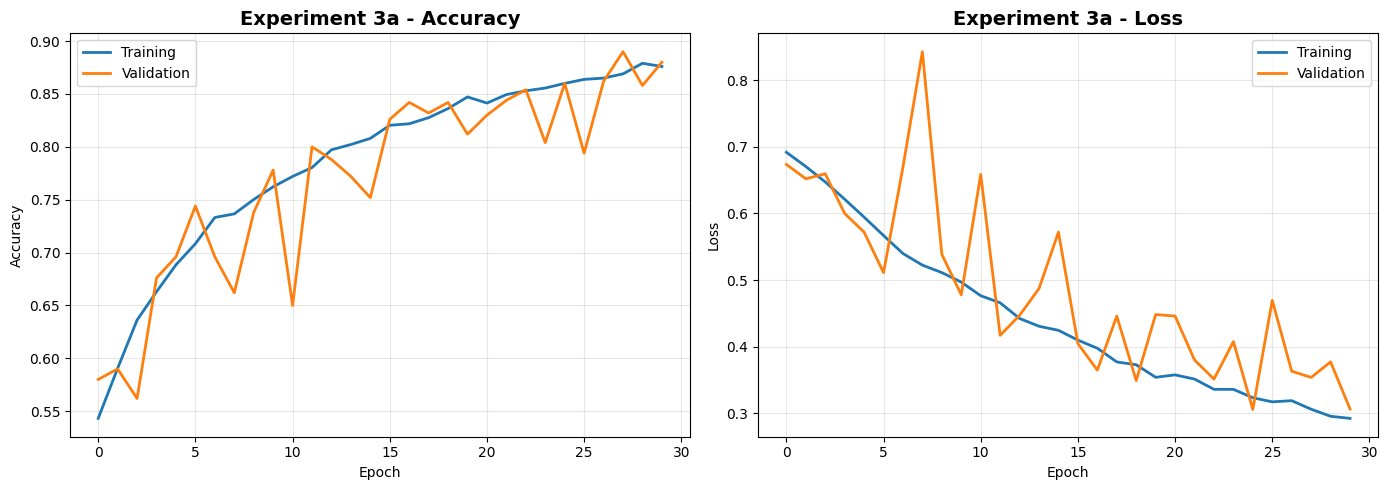

In [ ]:
training_size = 5000
val_size = 500
test_size = 500
subset_dir = '/tmp/subset_5000_scratch'

if os.path.exists(subset_dir):
    shutil.rmtree(subset_dir)

for split in ['training', 'validation', 'test']:
    for category in ['cats', 'dogs']:
        os.makedirs(os.path.join(subset_dir, split, category), exist_ok=True)

for category in ['cats', 'dogs']:
    training_source = os.path.join(base_dir, 'training', category)
    all_training_files = os.listdir(training_source)
    np.random.shuffle(all_training_files)

    training_files = all_training_files[:training_size // 2]
    test_files = all_training_files[training_size // 2:training_size // 2 + test_size // 2]

    val_source = os.path.join(base_dir, 'validation', category)
    val_files = os.listdir(val_source)[:val_size // 2]

    for fname in training_files:
        shutil.copy(os.path.join(training_source, fname), os.path.join(subset_dir, 'training', category, fname))
    for fname in test_files:
        shutil.copy(os.path.join(training_source, fname), os.path.join(subset_dir, 'test', category, fname))
    for fname in val_files:
        shutil.copy(os.path.join(val_source, fname), os.path.join(subset_dir, 'validation', category, fname))

print(f"Dataset created: {training_size} training, {val_size} val, {test_size} test")

training_dataset = tf.keras.utils.image_dataset_from_directory(os.path.join(subset_dir, 'training'), image_size=(180, 180), batch_size=32, label_mode='binary')
val_dataset = tf.keras.utils.image_dataset_from_directory(os.path.join(subset_dir, 'validation'), image_size=(180, 180), batch_size=32, label_mode='binary')
test_dataset = tf.keras.utils.image_dataset_from_directory(os.path.join(subset_dir, 'test'), image_size=(180, 180), batch_size=32, label_mode='binary', shuffle=False)

data_augmentation = keras.Sequential([layers.RandomFlip("horizontal"), layers.RandomRotation(0.1), layers.RandomZoom(0.2)])

model = models.Sequential([
    data_augmentation, layers.Rescaling(1./255),
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(180, 180, 3)), layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'), layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'), layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'), layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'), layers.Flatten(),
    layers.Dropout(0.5), layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.build(input_shape=(None, 180, 180, 3))
model.summary()

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)

history = model.fit(training_dataset, epochs=30, validation_data=val_dataset, callbacks=[early_stopping], verbose=1)

test_loss, test_acc = model.evaluate(test_dataset)

print(f"Experiment 3a RESULTS:")
print(f"Test Accuracy: {test_acc:.4f} ({test_acc*100:.2f}%)")
print(f"Test Loss: {test_loss:.4f}")

results.append({
    'experiment': 'Experiment 3a: From Scratch - 5,000 samples',
    'training_size': 5000, 'model_type': 'scratch', 'test_accuracy': test_acc,
    'test_loss': test_loss, 'final_val_accuracy': history.history['val_accuracy'][-1],
    'best_val_accuracy': max(history.history['val_accuracy']), 'epochs_trained': len(history.history['accuracy'])
})

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
ax1.plot(history.history['accuracy'], label='Training', linewidth=2)
ax1.plot(history.history['val_accuracy'], label='Validation', linewidth=2)
ax1.set_title('Experiment 3a - Accuracy', fontsize=14, fontweight='bold')
ax1.set_xlabel('Epoch'); ax1.set_ylabel('Accuracy')
ax1.legend(); ax1.grid(True, alpha=0.3)

ax2.plot(history.history['loss'], label='Training', linewidth=2)
ax2.plot(history.history['val_loss'], label='Validation', linewidth=2)
ax2.set_title('Experiment 3a - Loss', fontsize=14, fontweight='bold')
ax2.set_xlabel('Epoch'); ax2.set_ylabel('Loss')
ax2.legend(); ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Experiment 3b - FROM SCRATCH WITH 15,000 SAMPLES

Dataset created: 15000 training, 500 val, 500 test
Found 15000 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_6 (Sequential)       │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_3 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 18, 18, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 7, 7, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │        12,545 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 991,041 (3.78 MB)

 Trainable params: 991,041 (3.78 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 38ms/step - accuracy: 0.5376 - loss: 0.6949 - val_accuracy: 0.6660 - val_loss: 0.6059
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.6563 - loss: 0.6170 - val_accuracy: 0.6480 - val_loss: 0.6847
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7176 - loss: 0.5585 - val_accuracy: 0.7540 - val_loss: 0.4986
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7643 - loss: 0.4890 - val_accuracy: 0.8080 - val_loss: 0.4343
Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.7993 - loss: 0.4392 - val_accuracy: 0.8220 - val_loss: 0.4138
Epoch 6/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.8170 - loss: 0.4010 - val_accuracy: 0.8700 - val_loss: 0.3505
Epoch 7/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.8441 - loss: 0.3552 - val_accuracy: 0.8720 - val_loss: 0.3458
Epoch 8/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.8516 - loss: 0.3367 - 

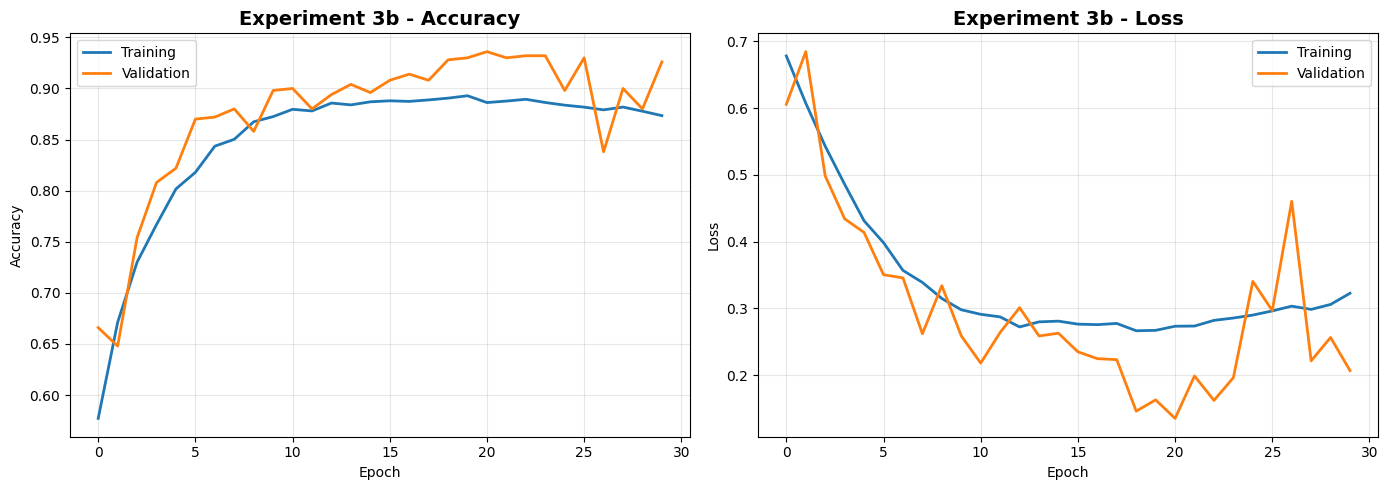

In [ ]:

training_size = 15000
val_size = 500
test_size = 500
subset_dir = '/tmp/subset_15000_scratch'

if os.path.exists(subset_dir):
    shutil.rmtree(subset_dir)

for split in ['training', 'validation', 'test']:
    for category in ['cats', 'dogs']:
        os.makedirs(os.path.join(subset_dir, split, category), exist_ok=True)

for category in ['cats', 'dogs']:
    training_source = os.path.join(base_dir, 'training', category)
    all_training_files = os.listdir(training_source)
    np.random.shuffle(all_training_files)

    training_files = all_training_files[:training_size // 2]
    test_files = all_training_files[training_size // 2:training_size // 2 + test_size // 2]

    val_source = os.path.join(base_dir, 'validation', category)
    val_files = os.listdir(val_source)[:val_size // 2]

    for fname in training_files:
        shutil.copy(os.path.join(training_source, fname), os.path.join(subset_dir, 'training', category, fname))
    for fname in test_files:
        shutil.copy(os.path.join(training_source, fname), os.path.join(subset_dir, 'test', category, fname))
    for fname in val_files:
        shutil.copy(os.path.join(val_source, fname), os.path.join(subset_dir, 'validation', category, fname))

print(f"Dataset created: {training_size} training, {val_size} val, {test_size} test")

training_dataset = tf.keras.utils.image_dataset_from_directory(os.path.join(subset_dir, 'training'), image_size=(180, 180), batch_size=32, label_mode='binary')
val_dataset = tf.keras.utils.image_dataset_from_directory(os.path.join(subset_dir, 'validation'), image_size=(180, 180), batch_size=32, label_mode='binary')
test_dataset = tf.keras.utils.image_dataset_from_directory(os.path.join(subset_dir, 'test'), image_size=(180, 180), batch_size=32, label_mode='binary', shuffle=False)

data_augmentation = keras.Sequential([layers.RandomFlip("horizontal"), layers.RandomRotation(0.1), layers.RandomZoom(0.2)])

model = models.Sequential([
    data_augmentation, layers.Rescaling(1./255),
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(180, 180, 3)), layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'), layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'), layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'), layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'), layers.Flatten(),
    layers.Dropout(0.5), layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.build(input_shape=(None, 180, 180, 3))
model.summary()

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)

history = model.fit(training_dataset, epochs=30, validation_data=val_dataset, callbacks=[early_stopping], verbose=1)

test_loss, test_acc = model.evaluate(test_dataset)

print(f"Experiment 3b RESULTS:")
print(f"Test Accuracy: {test_acc:.4f} ({test_acc*100:.2f}%)")
print(f"Test Loss: {test_loss:.4f}")

results.append({
    'experiment': 'Experiment 3b: From Scratch - 15,000 samples',
    'training_size': 15000, 'model_type': 'scratch', 'test_accuracy': test_acc,
    'test_loss': test_loss, 'final_val_accuracy': history.history['val_accuracy'][-1],
    'best_val_accuracy': max(history.history['val_accuracy']), 'epochs_trained': len(history.history['accuracy'])
})

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
ax1.plot(history.history['accuracy'], label='Training', linewidth=2)
ax1.plot(history.history['val_accuracy'], label='Validation', linewidth=2)
ax1.set_title('Experiment 3b - Accuracy', fontsize=14, fontweight='bold')
ax1.set_xlabel('Epoch'); ax1.set_ylabel('Accuracy')
ax1.legend(); ax1.grid(True, alpha=0.3)

ax2.plot(history.history['loss'], label='Training', linewidth=2)
ax2.plot(history.history['val_loss'], label='Validation', linewidth=2)
ax2.set_title('Experiment 3b - Loss', fontsize=14, fontweight='bold')
ax2.set_xlabel('Epoch'); ax2.set_ylabel('Loss')
ax2.legend(); ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Experiment 3c - FROM SCRATCH WITH 20,000 SAMPLES

Dataset created: 20000 training, 500 val, 500 test
Found 20000 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_8 (Sequential)       │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_4 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 18, 18, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 7, 7, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │        12,545 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 991,041 (3.78 MB)

 Trainable params: 991,041 (3.78 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 37ms/step - accuracy: 0.5196 - loss: 0.6930 - val_accuracy: 0.6880 - val_loss: 0.5903
Epoch 2/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.6766 - loss: 0.6017 - val_accuracy: 0.6940 - val_loss: 0.5822
Epoch 3/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7303 - loss: 0.5370 - val_accuracy: 0.7540 - val_loss: 0.5403
Epoch 4/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7727 - loss: 0.4814 - val_accuracy: 0.8220 - val_loss: 0.4015
Epoch 5/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.7960 - loss: 0.4377 - val_accuracy: 0.8560 - val_loss: 0.3500
Epoch 6/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.8220 - loss: 0.3870 - val_accuracy: 0.8460 - val_loss: 0.3512
Epoch 7/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.8422 - loss: 0.3579 - val_accuracy: 0.8640 - val_loss: 0.3228
Epoch 8/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.8512 - loss: 0.3354 - 

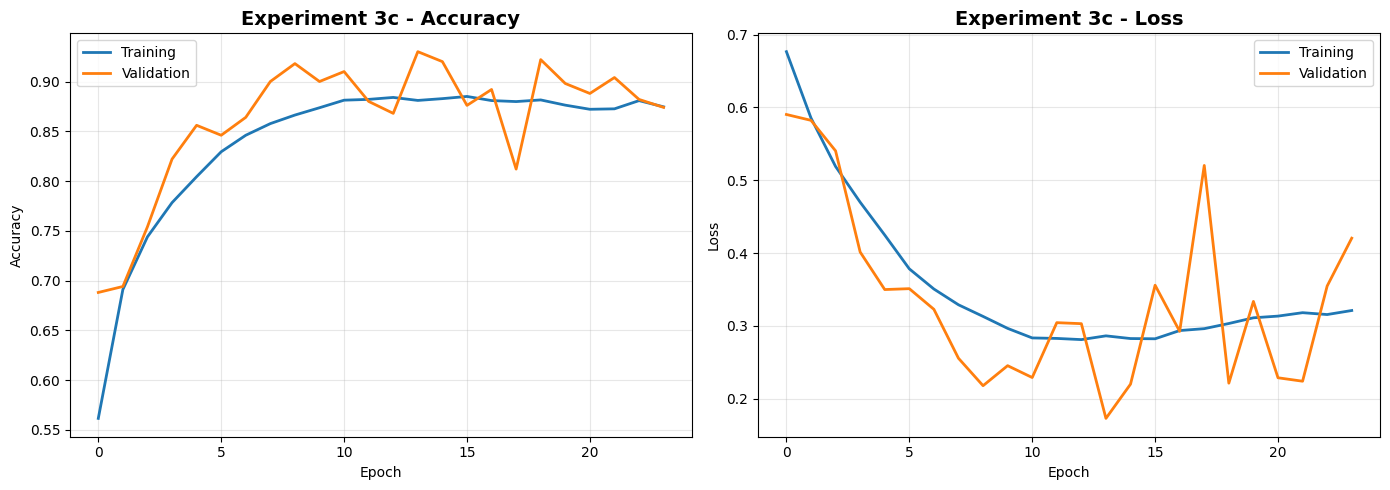

In [ ]:
training_size = 20000
val_size = 500
test_size = 500
subset_dir = '/tmp/subset_20000_scratch'

if os.path.exists(subset_dir):
    shutil.rmtree(subset_dir)

for split in ['training', 'validation', 'test']:
    for category in ['cats', 'dogs']:
        os.makedirs(os.path.join(subset_dir, split, category), exist_ok=True)

for category in ['cats', 'dogs']:
    training_source = os.path.join(base_dir, 'training', category)
    all_training_files = os.listdir(training_source)
    np.random.shuffle(all_training_files)

    training_files = all_training_files[:training_size // 2]
    test_files = all_training_files[training_size // 2:training_size // 2 + test_size // 2]

    val_source = os.path.join(base_dir, 'validation', category)
    val_files = os.listdir(val_source)[:val_size // 2]

    for fname in training_files:
        shutil.copy(os.path.join(training_source, fname), os.path.join(subset_dir, 'training', category, fname))
    for fname in test_files:
        shutil.copy(os.path.join(training_source, fname), os.path.join(subset_dir, 'test', category, fname))
    for fname in val_files:
        shutil.copy(os.path.join(val_source, fname), os.path.join(subset_dir, 'validation', category, fname))

print(f"Dataset created: {training_size} training, {val_size} val, {test_size} test")

training_dataset = tf.keras.utils.image_dataset_from_directory(os.path.join(subset_dir, 'training'), image_size=(180, 180), batch_size=32, label_mode='binary')
val_dataset = tf.keras.utils.image_dataset_from_directory(os.path.join(subset_dir, 'validation'), image_size=(180, 180), batch_size=32, label_mode='binary')
test_dataset = tf.keras.utils.image_dataset_from_directory(os.path.join(subset_dir, 'test'), image_size=(180, 180), batch_size=32, label_mode='binary', shuffle=False)

data_augmentation = keras.Sequential([layers.RandomFlip("horizontal"), layers.RandomRotation(0.1), layers.RandomZoom(0.2)])

model = models.Sequential([
    data_augmentation, layers.Rescaling(1./255),
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(180, 180, 3)), layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'), layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'), layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'), layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'), layers.Flatten(),
    layers.Dropout(0.5), layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.build(input_shape=(None, 180, 180, 3))
model.summary()

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)

history = model.fit(training_dataset, epochs=30, validation_data=val_dataset, callbacks=[early_stopping], verbose=1)

test_loss, test_acc = model.evaluate(test_dataset)

print(f"Experiment 3c RESULTS:")
print(f"Test Accuracy: {test_acc:.4f} ({test_acc*100:.2f}%)")
print(f"Test Loss: {test_loss:.4f}")

results.append({
    'experiment': 'Experiment 3c: From Scratch - 20,000 samples',
    'training_size': 20000, 'model_type': 'scratch', 'test_accuracy': test_acc,
    'test_loss': test_loss, 'final_val_accuracy': history.history['val_accuracy'][-1],
    'best_val_accuracy': max(history.history['val_accuracy']), 'epochs_trained': len(history.history['accuracy'])
})

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
ax1.plot(history.history['accuracy'], label='Training', linewidth=2)
ax1.plot(history.history['val_accuracy'], label='Validation', linewidth=2)
ax1.set_title('Experiment 3c - Accuracy', fontsize=14, fontweight='bold')
ax1.set_xlabel('Epoch'); ax1.set_ylabel('Accuracy')
ax1.legend(); ax1.grid(True, alpha=0.3)

ax2.plot(history.history['loss'], label='Training', linewidth=2)
ax2.plot(history.history['val_loss'], label='Validation', linewidth=2)
ax2.set_title('Experiment 3c - Loss', fontsize=14, fontweight='bold')
ax2.set_xlabel('Epoch'); ax2.set_ylabel('Loss')
ax2.legend(); ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Experiment 4a - PRETRAINED WITH 1,000 SAMPLES

Dataset created: 1000 training, 500 val, 500 test
Found 1000 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_10 (Sequential)      │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg16 (Functional)              │ (None, 5, 5, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │     3,277,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,992,001 (68.63 MB)

 Trainable params: 3,277,313 (12.50 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 229ms/step - accuracy: 0.6993 - loss: 28.8810 - val_accuracy: 0.9160 - val_loss: 0.3891
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 140ms/step - accuracy: 0.8773 - loss: 0.5232 - val_accuracy: 0.9340 - val_loss: 0.2671
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 140ms/step - accuracy: 0.8705 - loss: 0.4755 - val_accuracy: 0.9320 - val_loss: 0.3684
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 140ms/step - accuracy: 0.9042 - loss: 0.4552 - val_accuracy: 0.9360 - val_loss: 0.4146
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 141ms/step - accuracy: 0.9083 - loss: 0.3914 - val_accuracy: 0.9120 - val_loss: 0.4628
Epoch 6/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 142ms/step - accuracy: 0.9184 - loss: 0.3295 - val_accuracy: 0.9380 - val_loss: 0.3401
Epoch 7/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 141ms/step - accuracy: 0.9476 - loss: 0.2180 - val_accuracy: 0.9460 - val_loss: 0.3767
Epoch 8/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 141ms/step - accuracy: 0.9412 - loss: 0.2713 - val_accuracy: 

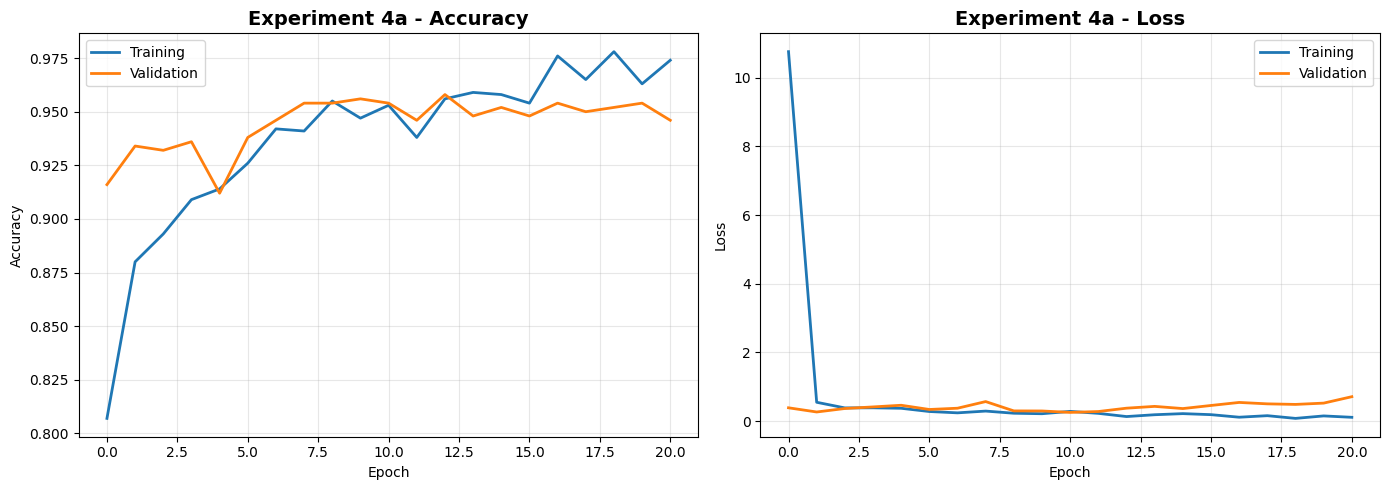

In [ ]:
training_size = 1000
val_size = 500
test_size = 500
subset_dir = '/tmp/subset_1000_pretrained'

if os.path.exists(subset_dir):
    shutil.rmtree(subset_dir)

for split in ['training', 'validation', 'test']:
    for category in ['cats', 'dogs']:
        os.makedirs(os.path.join(subset_dir, split, category), exist_ok=True)

for category in ['cats', 'dogs']:
    training_source = os.path.join(base_dir, 'training', category)
    all_training_files = os.listdir(training_source)
    np.random.shuffle(all_training_files)

    training_files = all_training_files[:training_size // 2]
    test_files = all_training_files[training_size // 2:training_size // 2 + test_size // 2]

    val_source = os.path.join(base_dir, 'validation', category)
    val_files = os.listdir(val_source)[:val_size // 2]

    for fname in training_files:
        shutil.copy(os.path.join(training_source, fname), os.path.join(subset_dir, 'training', category, fname))
    for fname in test_files:
        shutil.copy(os.path.join(training_source, fname), os.path.join(subset_dir, 'test', category, fname))
    for fname in val_files:
        shutil.copy(os.path.join(val_source, fname), os.path.join(subset_dir, 'validation', category, fname))

print(f"Dataset created: {training_size} training, {val_size} val, {test_size} test")

training_dataset = tf.keras.utils.image_dataset_from_directory(os.path.join(subset_dir, 'training'), image_size=(180, 180), batch_size=32, label_mode='binary')
val_dataset = tf.keras.utils.image_dataset_from_directory(os.path.join(subset_dir, 'validation'), image_size=(180, 180), batch_size=32, label_mode='binary')
test_dataset = tf.keras.utils.image_dataset_from_directory(os.path.join(subset_dir, 'test'), image_size=(180, 180), batch_size=32, label_mode='binary', shuffle=False)

# Build pretrained model
conv_base = keras.applications.vgg16.VGG16(weights='imagenet', include_top=False, input_shape=(180, 180, 3))
conv_base.trainable = False

data_augmentation = keras.Sequential([layers.RandomFlip("horizontal"), layers.RandomRotation(0.1), layers.RandomZoom(0.2)])

model = models.Sequential([
    data_augmentation, conv_base, layers.Flatten(),
    layers.Dense(256, activation='relu'), layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.build(input_shape=(None, 180, 180, 3))
model.summary()

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)

history = model.fit(training_dataset, epochs=30, validation_data=val_dataset, callbacks=[early_stopping], verbose=1)

test_loss, test_acc = model.evaluate(test_dataset)

print(f"Experiment 4a RESULTS:")
print(f"Test Accuracy: {test_acc:.4f} ({test_acc*100:.2f}%)")
print(f"Test Loss: {test_loss:.4f}")


results.append({
    'experiment': 'Experiment 4a: Pretrained - 1,000 samples',
    'training_size': 1000, 'model_type': 'pretrained', 'test_accuracy': test_acc,
    'test_loss': test_loss, 'final_val_accuracy': history.history['val_accuracy'][-1],
    'best_val_accuracy': max(history.history['val_accuracy']), 'epochs_trained': len(history.history['accuracy'])
})

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
ax1.plot(history.history['accuracy'], label='Training', linewidth=2)
ax1.plot(history.history['val_accuracy'], label='Validation', linewidth=2)
ax1.set_title('Experiment 4a - Accuracy', fontsize=14, fontweight='bold')
ax1.set_xlabel('Epoch'); ax1.set_ylabel('Accuracy')
ax1.legend(); ax1.grid(True, alpha=0.3)

ax2.plot(history.history['loss'], label='Training', linewidth=2)
ax2.plot(history.history['val_loss'], label='Validation', linewidth=2)
ax2.set_title('Experiment 4a - Loss', fontsize=14, fontweight='bold')
ax2.set_xlabel('Epoch'); ax2.set_ylabel('Loss')
ax2.legend(); ax2.grid(True, alpha=0.3)

plt.tight_layout();
plt.show()

Experiment 4b - PRETRAINED WITH 10,000 SAMPLES

Dataset created: 10000 training, 500 val, 500 test
Found 10000 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_12 (Sequential)      │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg16 (Functional)              │ (None, 5, 5, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │     3,277,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,992,001 (68.63 MB)

 Trainable params: 3,277,313 (12.50 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 34s 104ms/step - accuracy: 0.8429 - loss: 6.3171 - val_accuracy: 0.9600 - val_loss: 0.2710
Epoch 2/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 31s 99ms/step - accuracy: 0.9118 - loss: 0.3761 - val_accuracy: 0.9580 - val_loss: 0.3401
Epoch 3/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 31s 98ms/step - accuracy: 0.9243 - loss: 0.3123 - val_accuracy: 0.9660 - val_loss: 0.2919
Epoch 4/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 31s 98ms/step - accuracy: 0.9334 - loss: 0.2653 - val_accuracy: 0.9480 - val_loss: 0.2841
Epoch 5/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 31s 98ms/step - accuracy: 0.9392 - loss: 0.2616 - val_accuracy: 0.9680 - val_loss: 0.3018
Epoch 6/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 31s 99ms/step - accuracy: 0.9416 - loss: 0.2138 - val_accuracy: 0.9580 - val_loss: 0.3343
Epoch 7/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 31s 99ms/step - accuracy: 0.9395 - loss: 0.2290 - val_accuracy: 0.9540 - val_loss: 0.2915
Epoch 8/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 31s 99ms/step - accuracy: 0.9394 - loss: 0.2242 -

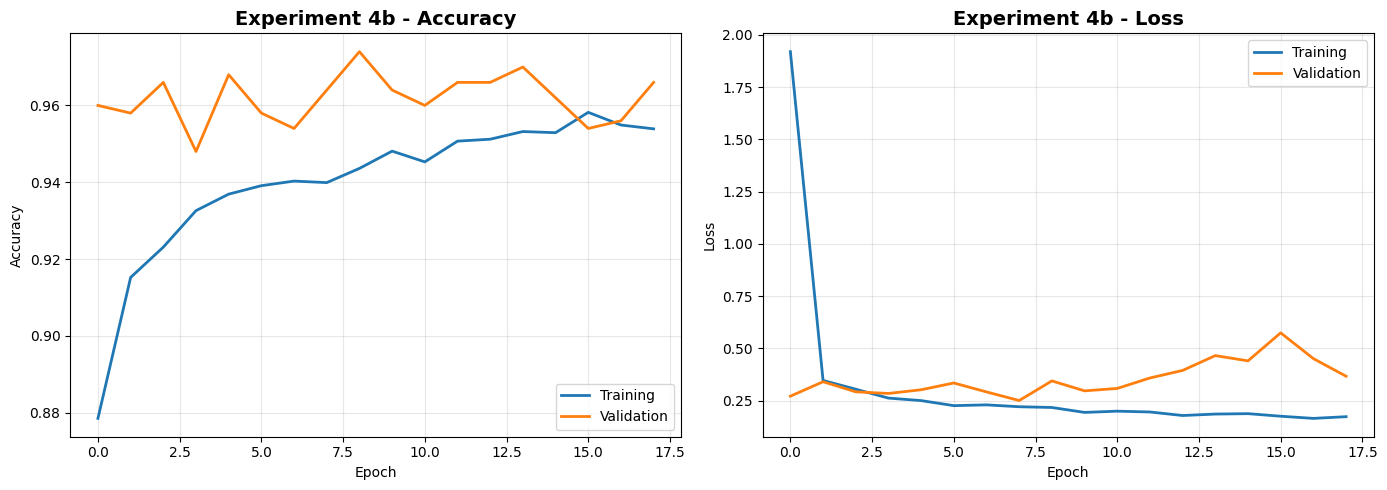

In [ ]:
training_size = 10000
val_size = 500
test_size = 500
subset_dir = '/tmp/subset_10000_pretrained'

if os.path.exists(subset_dir):
    shutil.rmtree(subset_dir)

for split in ['training', 'validation', 'test']:
    for category in ['cats', 'dogs']:
        os.makedirs(os.path.join(subset_dir, split, category), exist_ok=True)

for category in ['cats', 'dogs']:
    training_source = os.path.join(base_dir, 'training', category)
    all_training_files = os.listdir(training_source)
    np.random.shuffle(all_training_files)

    training_files = all_training_files[:training_size // 2]
    test_files = all_training_files[training_size // 2:training_size // 2 + test_size // 2]

    val_source = os.path.join(base_dir, 'validation', category)
    val_files = os.listdir(val_source)[:val_size // 2]

    for fname in training_files:
        shutil.copy(os.path.join(training_source, fname), os.path.join(subset_dir, 'training', category, fname))
    for fname in test_files:
        shutil.copy(os.path.join(training_source, fname), os.path.join(subset_dir, 'test', category, fname))
    for fname in val_files:
        shutil.copy(os.path.join(val_source, fname), os.path.join(subset_dir, 'validation', category, fname))

print(f"Dataset created: {training_size} training, {val_size} val, {test_size} test")

training_dataset = tf.keras.utils.image_dataset_from_directory(os.path.join(subset_dir, 'training'), image_size=(180, 180), batch_size=32, label_mode='binary')
val_dataset = tf.keras.utils.image_dataset_from_directory(os.path.join(subset_dir, 'validation'), image_size=(180, 180), batch_size=32, label_mode='binary')
test_dataset = tf.keras.utils.image_dataset_from_directory(os.path.join(subset_dir, 'test'), image_size=(180, 180), batch_size=32, label_mode='binary', shuffle=False)

conv_base = keras.applications.vgg16.VGG16(weights='imagenet', include_top=False, input_shape=(180, 180, 3))
conv_base.trainable = False

data_augmentation = keras.Sequential([layers.RandomFlip("horizontal"), layers.RandomRotation(0.1), layers.RandomZoom(0.2)])

model = models.Sequential([
    data_augmentation, conv_base, layers.Flatten(),
    layers.Dense(256, activation='relu'), layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.build(input_shape=(None, 180, 180, 3))
model.summary()

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)

history = model.fit(training_dataset, epochs=30, validation_data=val_dataset, callbacks=[early_stopping], verbose=1)

test_loss, test_acc = model.evaluate(test_dataset)

print(f"Experiment 4b RESULTS:")
print(f"Test Accuracy: {test_acc:.4f} ({test_acc*100:.2f}%)")
print(f"Test Loss: {test_loss:.4f}")


results.append({
    'experiment': 'Experiment 4b: Pretrained - 10,000 samples',
    'training_size': 10000, 'model_type': 'pretrained', 'test_accuracy': test_acc,
    'test_loss': test_loss, 'final_val_accuracy': history.history['val_accuracy'][-1],
    'best_val_accuracy': max(history.history['val_accuracy']), 'epochs_trained': len(history.history['accuracy'])
})

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
ax1.plot(history.history['accuracy'], label='Training', linewidth=2)
ax1.plot(history.history['val_accuracy'], label='Validation', linewidth=2)
ax1.set_title('Experiment 4b - Accuracy', fontsize=14, fontweight='bold')
ax1.set_xlabel('Epoch'); ax1.set_ylabel('Accuracy')
ax1.legend(); ax1.grid(True, alpha=0.3)

ax2.plot(history.history['loss'], label='Training', linewidth=2)
ax2.plot(history.history['val_loss'], label='Validation', linewidth=2)
ax2.set_title('Experiment 4b - Loss', fontsize=14, fontweight='bold')
ax2.set_xlabel('Epoch'); ax2.set_ylabel('Loss')
ax2.legend(); ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Experiment 4c-i - PRETRAINED WITH 5,000 SAMPLES

Dataset created: 5000 training, 500 val, 500 test
Found 5000 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_14 (Sequential)      │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg16 (Functional)              │ (None, 5, 5, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 256)            │     3,277,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,992,001 (68.63 MB)

 Trainable params: 3,277,313 (12.50 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 18s 105ms/step - accuracy: 0.8296 - loss: 7.0007 - val_accuracy: 0.9340 - val_loss: 0.4020
Epoch 2/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 16s 103ms/step - accuracy: 0.9025 - loss: 0.5154 - val_accuracy: 0.9440 - val_loss: 0.3083
Epoch 3/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 16s 103ms/step - accuracy: 0.9160 - loss: 0.4006 - val_accuracy: 0.9540 - val_loss: 0.3597
Epoch 4/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 16s 103ms/step - accuracy: 0.9215 - loss: 0.3362 - val_accuracy: 0.9500 - val_loss: 0.2877
Epoch 5/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 16s 103ms/step - accuracy: 0.9239 - loss: 0.3133 - val_accuracy: 0.9380 - val_loss: 0.4862
Epoch 6/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 16s 103ms/step - accuracy: 0.9304 - loss: 0.3173 - val_accuracy: 0.9660 - val_loss: 0.2666
Epoch 7/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 16s 103ms/step - accuracy: 0.9403 - loss: 0.2650 - val_accuracy: 0.9680 - val_loss: 0.3104
Epoch 8/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 16s 103ms/step - accuracy: 0.9454 - loss: 0

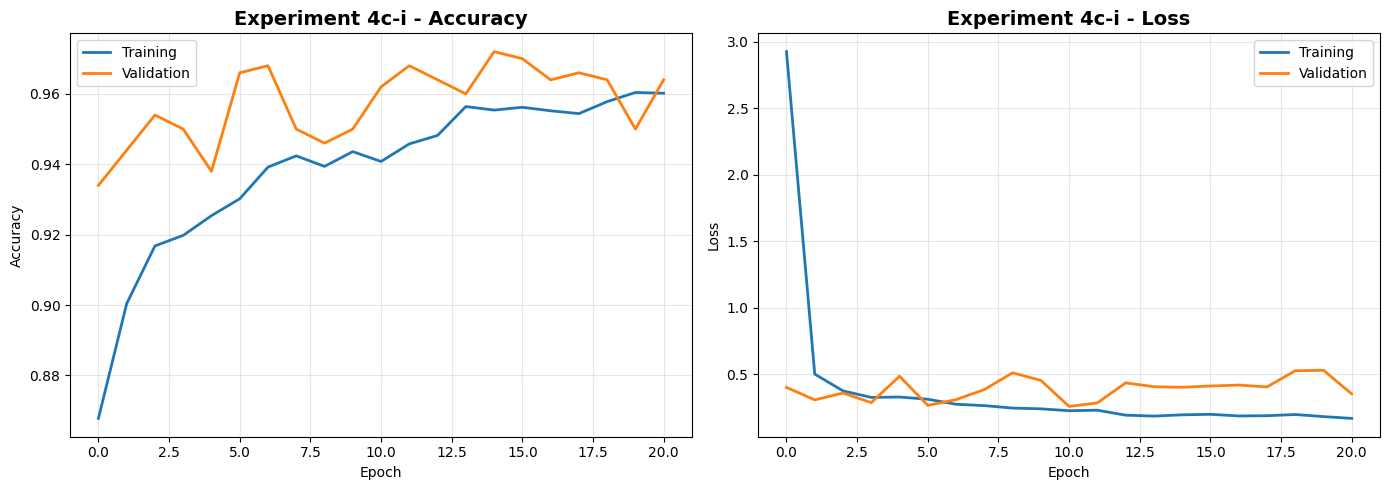

In [ ]:
training_size = 5000
val_size = 500
test_size = 500
subset_dir = '/tmp/subset_5000_pretrained'

if os.path.exists(subset_dir):
    shutil.rmtree(subset_dir)

for split in ['training', 'validation', 'test']:
    for category in ['cats', 'dogs']:
        os.makedirs(os.path.join(subset_dir, split, category), exist_ok=True)

for category in ['cats', 'dogs']:
    training_source = os.path.join(base_dir, 'training', category)
    all_training_files = os.listdir(training_source)
    np.random.shuffle(all_training_files)

    training_files = all_training_files[:training_size // 2]
    test_files = all_training_files[training_size // 2:training_size // 2 + test_size // 2]

    val_source = os.path.join(base_dir, 'validation', category)
    val_files = os.listdir(val_source)[:val_size // 2]

    for fname in training_files:
        shutil.copy(os.path.join(training_source, fname), os.path.join(subset_dir, 'training', category, fname))
    for fname in test_files:
        shutil.copy(os.path.join(training_source, fname), os.path.join(subset_dir, 'test', category, fname))
    for fname in val_files:
        shutil.copy(os.path.join(val_source, fname), os.path.join(subset_dir, 'validation', category, fname))

print(f"Dataset created: {training_size} training, {val_size} val, {test_size} test")

training_dataset = tf.keras.utils.image_dataset_from_directory(os.path.join(subset_dir, 'training'), image_size=(180, 180), batch_size=32, label_mode='binary')
val_dataset = tf.keras.utils.image_dataset_from_directory(os.path.join(subset_dir, 'validation'), image_size=(180, 180), batch_size=32, label_mode='binary')
test_dataset = tf.keras.utils.image_dataset_from_directory(os.path.join(subset_dir, 'test'), image_size=(180, 180), batch_size=32, label_mode='binary', shuffle=False)

conv_base = keras.applications.vgg16.VGG16(weights='imagenet', include_top=False, input_shape=(180, 180, 3))
conv_base.trainable = False

data_augmentation = keras.Sequential([layers.RandomFlip("horizontal"), layers.RandomRotation(0.1), layers.RandomZoom(0.2)])

model = models.Sequential([
    data_augmentation, conv_base, layers.Flatten(),
    layers.Dense(256, activation='relu'), layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.build(input_shape=(None, 180, 180, 3))
model.summary()

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)

history = model.fit(training_dataset, epochs=30, validation_data=val_dataset, callbacks=[early_stopping], verbose=1)

test_loss, test_acc = model.evaluate(test_dataset)

print(f"Experiment 4c-i RESULTS:")
print(f"Test Accuracy: {test_acc:.4f} ({test_acc*100:.2f}%)")
print(f"Test Loss: {test_loss:.4f}")


results.append({
    'experiment': 'Experiment 4c-i: Pretrained - 5,000 samples',
    'training_size': 5000, 'model_type': 'pretrained', 'test_accuracy': test_acc,
    'test_loss': test_loss, 'final_val_accuracy': history.history['val_accuracy'][-1],
    'best_val_accuracy': max(history.history['val_accuracy']), 'epochs_trained': len(history.history['accuracy'])
})

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
ax1.plot(history.history['accuracy'], label='Training', linewidth=2)
ax1.plot(history.history['val_accuracy'], label='Validation', linewidth=2)
ax1.set_title('Experiment 4c-i - Accuracy', fontsize=14, fontweight='bold')
ax1.set_xlabel('Epoch'); ax1.set_ylabel('Accuracy')
ax1.legend(); ax1.grid(True, alpha=0.3)

ax2.plot(history.history['loss'], label='Training', linewidth=2)
ax2.plot(history.history['val_loss'], label='Validation', linewidth=2)
ax2.set_title('Experiment 4c-i - Loss', fontsize=14, fontweight='bold')
ax2.set_xlabel('Epoch'); ax2.set_ylabel('Loss')
ax2.legend(); ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Experiment 4c-ii - PRETRAINED WITH 15,000 SAMPLES

Dataset created: 15000 training, 500 val, 500 test
Found 15000 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_16 (Sequential)      │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg16 (Functional)              │ (None, 5, 5, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 256)            │     3,277,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,992,001 (68.63 MB)

 Trainable params: 3,277,313 (12.50 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 49s 102ms/step - accuracy: 0.8612 - loss: 5.4612 - val_accuracy: 0.9660 - val_loss: 0.2208
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 46s 97ms/step - accuracy: 0.9240 - loss: 0.2883 - val_accuracy: 0.9640 - val_loss: 0.1877
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 45s 97ms/step - accuracy: 0.9304 - loss: 0.2441 - val_accuracy: 0.9600 - val_loss: 0.2491
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 46s 97ms/step - accuracy: 0.9367 - loss: 0.2175 - val_accuracy: 0.9620 - val_loss: 0.2653
Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 45s 97ms/step - accuracy: 0.9381 - loss: 0.2111 - val_accuracy: 0.9700 - val_loss: 0.2154
Epoch 6/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 45s 97ms/step - accuracy: 0.9426 - loss: 0.2095 - val_accuracy: 0.9580 - val_loss: 0.3072
Epoch 7/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 46s 97ms/step - accuracy: 0.9457 - loss: 0.1987 - val_accuracy: 0.9680 - val_loss: 0.1471
Epoch 8/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 46s 97ms/step - accuracy: 0.9474 - loss: 0.2006 -

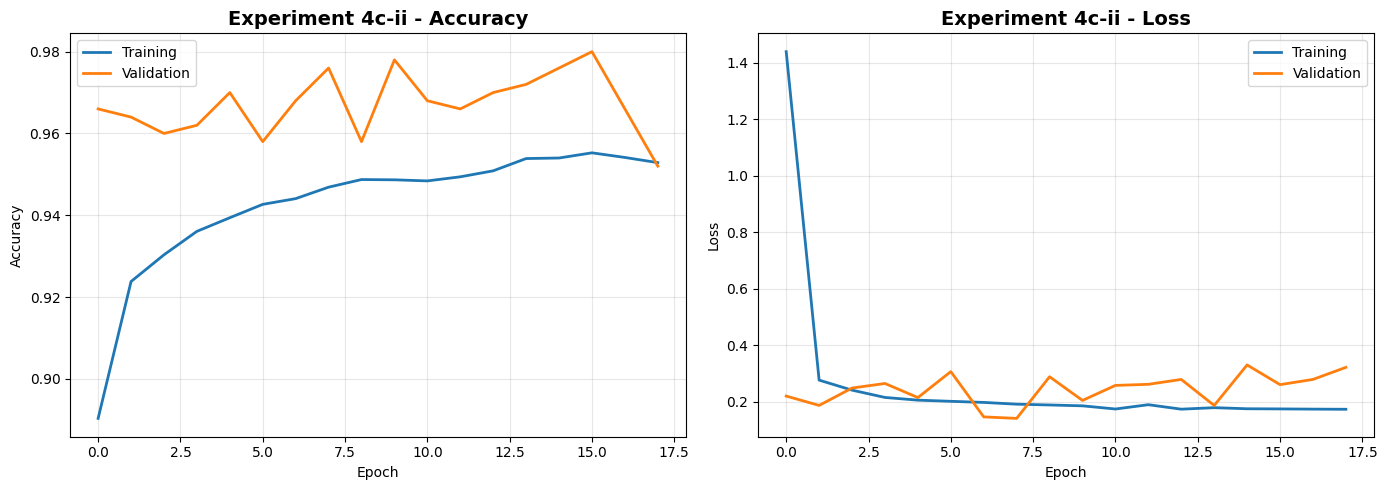

In [ ]:
training_size = 15000
val_size = 500
test_size = 500
subset_dir = '/tmp/subset_15000_pretrained'

if os.path.exists(subset_dir):
    shutil.rmtree(subset_dir)

for split in ['training', 'validation', 'test']:
    for category in ['cats', 'dogs']:
        os.makedirs(os.path.join(subset_dir, split, category), exist_ok=True)

for category in ['cats', 'dogs']:
    training_source = os.path.join(base_dir, 'training', category)
    all_training_files = os.listdir(training_source)
    np.random.shuffle(all_training_files)

    training_files = all_training_files[:training_size // 2]
    test_files = all_training_files[training_size // 2:training_size // 2 + test_size // 2]

    val_source = os.path.join(base_dir, 'validation', category)
    val_files = os.listdir(val_source)[:val_size // 2]

    for fname in training_files:
        shutil.copy(os.path.join(training_source, fname), os.path.join(subset_dir, 'training', category, fname))
    for fname in test_files:
        shutil.copy(os.path.join(training_source, fname), os.path.join(subset_dir, 'test', category, fname))
    for fname in val_files:
        shutil.copy(os.path.join(val_source, fname), os.path.join(subset_dir, 'validation', category, fname))

print(f"Dataset created: {training_size} training, {val_size} val, {test_size} test")

training_dataset = tf.keras.utils.image_dataset_from_directory(os.path.join(subset_dir, 'training'), image_size=(180, 180), batch_size=32, label_mode='binary')
val_dataset = tf.keras.utils.image_dataset_from_directory(os.path.join(subset_dir, 'validation'), image_size=(180, 180), batch_size=32, label_mode='binary')
test_dataset = tf.keras.utils.image_dataset_from_directory(os.path.join(subset_dir, 'test'), image_size=(180, 180), batch_size=32, label_mode='binary', shuffle=False)

conv_base = keras.applications.vgg16.VGG16(weights='imagenet', include_top=False, input_shape=(180, 180, 3))
conv_base.trainable = False

data_augmentation = keras.Sequential([layers.RandomFlip("horizontal"), layers.RandomRotation(0.1), layers.RandomZoom(0.2)])

model = models.Sequential([
    data_augmentation, conv_base, layers.Flatten(),
    layers.Dense(256, activation='relu'), layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.build(input_shape=(None, 180, 180, 3))
model.summary()

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)

history = model.fit(training_dataset, epochs=30, validation_data=val_dataset, callbacks=[early_stopping], verbose=1)

test_loss, test_acc = model.evaluate(test_dataset)

print(f"Experiment 4c-ii RESULTS:")
print(f"Test Accuracy: {test_acc:.4f} ({test_acc*100:.2f}%)")
print(f"Test Loss: {test_loss:.4f}")

results.append({
    'experiment': 'Experiment 4c-ii: Pretrained - 15,000 samples',
    'training_size': 15000, 'model_type': 'pretrained', 'test_accuracy': test_acc,
    'test_loss': test_loss, 'final_val_accuracy': history.history['val_accuracy'][-1],
    'best_val_accuracy': max(history.history['val_accuracy']), 'epochs_trained': len(history.history['accuracy'])
})

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
ax1.plot(history.history['accuracy'], label='Training', linewidth=2)
ax1.plot(history.history['val_accuracy'], label='Validation', linewidth=2)
ax1.set_title('Experiment 4c-ii - Accuracy', fontsize=14, fontweight='bold')
ax1.set_xlabel('Epoch'); ax1.set_ylabel('Accuracy')
ax1.legend(); ax1.grid(True, alpha=0.3)

ax2.plot(history.history['loss'], label='Training', linewidth=2)
ax2.plot(history.history['val_loss'], label='Validation', linewidth=2)
ax2.set_title('Experiment 4c-ii - Loss', fontsize=14, fontweight='bold')
ax2.set_xlabel('Epoch'); ax2.set_ylabel('Loss')
ax2.legend(); ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

RESULTS SUMMARY

In [ ]:
import pandas as pd
from IPython.display import display
results_df = pd.DataFrame(results)

display(results_df[['experiment', 'training_size', 'model_type', 'test_accuracy']])

,experiment,training_size,model_type,test_accuracy
0,"Experiment 1: From Scratch - 1,000 samples",1000,scratch,0.706
1,"Experiment 2: From Scratch - 10,000 samples",10000,scratch,0.906
2,"Experiment 3a: From Scratch - 5,000 samples",5000,scratch,0.858
3,"Experiment 3b: From Scratch - 15,000 samples",15000,scratch,0.912
4,"Experiment 3c: From Scratch - 20,000 samples",20000,scratch,0.916
5,"Experiment 4a: Pretrained - 1,000 samples",1000,pretrained,0.958
6,"Experiment 4b: Pretrained - 10,000 samples",10000,pretrained,0.978
7,"Experiment 4c-i: Pretrained - 5,000 samples",5000,pretrained,0.968
8,"Experiment 4c-ii: Pretrained - 15,000 samples",15000,pretrained,0.972


Performance Comparison

In [ ]:
scratch_models = results_df[results_df['model_type'] == 'scratch'].copy()
pretrained_models = results_df[results_df['model_type'] == 'pretrained'].copy()

best_scratch = scratch_models.loc[scratch_models['test_accuracy'].idxmax()]
best_pretrained = pretrained_models.loc[pretrained_models['test_accuracy'].idxmax()]

print("\n1. OPTIMAL TRAINING SIZES:")
print(f"\n   FROM SCRATCH MODEL:")
print(f"   - Optimal Training Size: {int(best_scratch['training_size'])} samples")
print(f"   - Test Accuracy: {best_scratch['test_accuracy']*100:.2f}%")
print(f"   - Test Loss: {best_scratch['test_loss']:.4f}")
print(f"   - Experiment: {best_scratch['experiment']}")

print(f"\n   PRETRAINED MODEL:")
print(f"   - Optimal Training Size: {int(best_pretrained['training_size'])} samples")
print(f"   - Test Accuracy: {best_pretrained['test_accuracy']*100:.2f}%")
print(f"   - Test Loss: {best_pretrained['test_loss']:.4f}")
print(f"   - Experiment: {best_pretrained['experiment']}")

print("\n2. IMPACT OF TRAINING DATA SIZE (1,000 vs 10,000 samples):")

scratch_1k = results_df[(results_df['model_type'] == 'scratch') &
                         (results_df['training_size'] == 1000)]['test_accuracy'].values[0]
scratch_10k = results_df[(results_df['model_type'] == 'scratch') &
                          (results_df['training_size'] == 10000)]['test_accuracy'].values[0]
pretrained_1k = results_df[(results_df['model_type'] == 'pretrained') &
                            (results_df['training_size'] == 1000)]['test_accuracy'].values[0]
pretrained_10k = results_df[(results_df['model_type'] == 'pretrained') &
                             (results_df['training_size'] == 10000)]['test_accuracy'].values[0]

print(f"\n   FROM SCRATCH:")
print(f"   - 1,000 samples: {scratch_1k*100:.2f}%")
print(f"   - 10,000 samples: {scratch_10k*100:.2f}%")
print(f"   - Improvement: +{(scratch_10k - scratch_1k)*100:.2f} percentage points " +
      f"({((scratch_10k - scratch_1k)/scratch_1k*100):.1f}% relative increase)")

print(f"\n   PRETRAINED:")
print(f"   - 1,000 samples: {pretrained_1k*100:.2f}%")
print(f"   - 10,000 samples: {pretrained_10k*100:.2f}%")
print(f"   - Improvement: +{(pretrained_10k - pretrained_1k)*100:.2f} percentage points " +
      f"({((pretrained_10k - pretrained_1k)/pretrained_1k*100):.1f}% relative increase)")

print("\n3. FROM SCRATCH VS PRETRAINED COMPARISON:")

sample_sizes = sorted(results_df['training_size'].unique())

for size in sample_sizes:
    scratch_acc = results_df[(results_df['training_size'] == size) &
                              (results_df['model_type'] == 'scratch')]['test_accuracy'].values
    pretrained_acc = results_df[(results_df['training_size'] == size) &
                                 (results_df['model_type'] == 'pretrained')]['test_accuracy'].values

    if len(scratch_acc) > 0 and len(pretrained_acc) > 0:
        diff = pretrained_acc[0] - scratch_acc[0]
        advantage = "Pretrained" if diff > 0 else "From Scratch"

        print(f"\n   Training Size: {int(size):,} samples")
        print(f"   - From Scratch:  {scratch_acc[0]*100:.2f}%")
        print(f"   - Pretrained:    {pretrained_acc[0]*100:.2f}%")
        print(f"   - Advantage:     {advantage} by {abs(diff)*100:.2f} percentage points")


1. OPTIMAL TRAINING SIZES:

   FROM SCRATCH MODEL:
   - Optimal Training Size: 20000 samples
   - Test Accuracy: 91.60%
   - Test Loss: 0.1882
   - Experiment: Experiment 3c: From Scratch - 20,000 samples

   PRETRAINED MODEL:
   - Optimal Training Size: 10000 samples
   - Test Accuracy: 97.80%
   - Test Loss: 0.0919
   - Experiment: Experiment 4b: Pretrained - 10,000 samples

2. IMPACT OF TRAINING DATA SIZE (1,000 vs 10,000 samples):

   FROM SCRATCH:
   - 1,000 samples: 70.60%
   - 10,000 samples: 90.60%
   - Improvement: +20.00 percentage points (28.3% relative increase)

   PRETRAINED:
   - 1,000 samples: 95.80%
   - 10,000 samples: 97.80%
   - Improvement: +2.00 percentage points (2.1% relative increase)

3. FROM SCRATCH VS PRETRAINED COMPARISON:

   Training Size: 1,000 samples
   - From Scratch:  70.60%
   - Pretrained:    95.80%
   - Advantage:     Pretrained by 25.20 percentage points

   Training Size: 5,000 samples
   - From Scratch:  85.80%
   - Pretrained:    96.80%
   - 

Performance Comparison


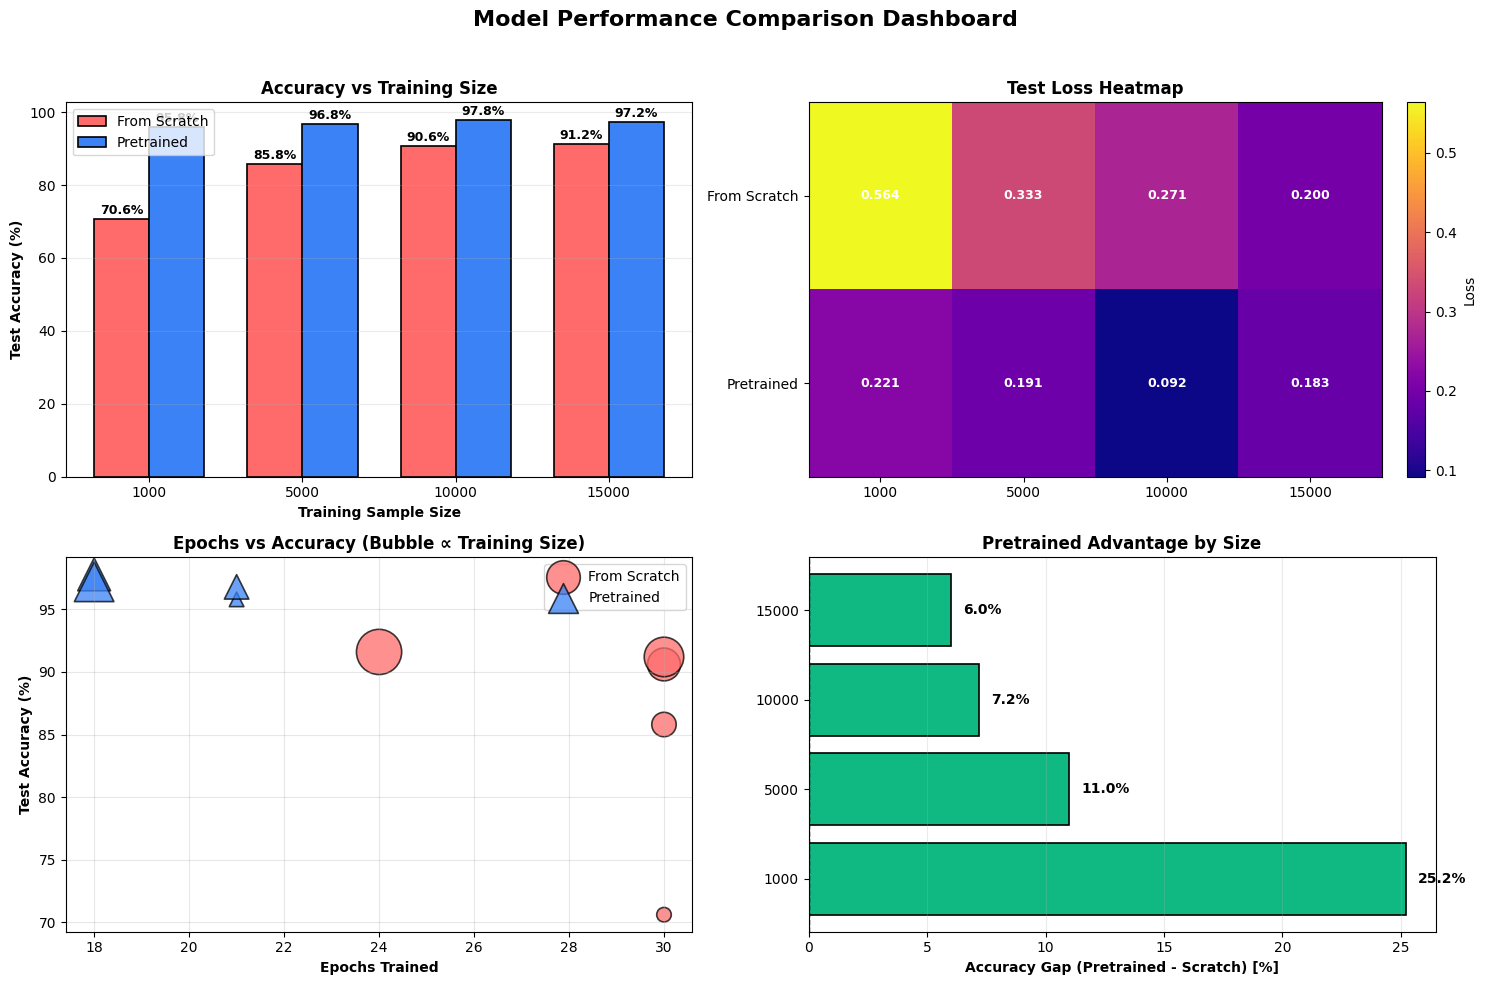

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Prepare data
scratch_data = results_df[results_df['model_type'] == 'scratch'].sort_values('training_size').copy()
pretrained_data = results_df[results_df['model_type'] == 'pretrained'].sort_values('training_size').copy()

sizes_common = sorted(set(scratch_data['training_size']).intersection(set(pretrained_data['training_size'])))

scratch_acc = [float(scratch_data.loc[scratch_data['training_size']==s, 'test_accuracy'].iloc[0])*100 for s in sizes_common]
pretrain_acc = [float(pretrained_data.loc[pretrained_data['training_size']==s, 'test_accuracy'].iloc[0])*100 for s in sizes_common]

scratch_loss = [float(scratch_data.loc[scratch_data['training_size']==s, 'test_loss'].iloc[0]) for s in sizes_common]
pretrain_loss = [float(pretrained_data.loc[pretrained_data['training_size']==s, 'test_loss'].iloc[0]) for s in sizes_common]

# Color palette
COL_SCR = "#ff6b6b"     # coral red
COL_PRE = "#3b82f6"     # blue
COL_GAP_POS = "#10b981" # green
COL_GAP_NEG = "#ef4444" # red

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle("Model Performance Comparison Dashboard", fontsize=16, fontweight='bold')

# GROUPED BAR: Accuracy by Training Size
ax = axes[0, 0]
x = np.arange(len(sizes_common))
bar_w = 0.36

b1 = ax.bar(x - bar_w/2, scratch_acc, width=bar_w, color=COL_SCR, edgecolor='black', linewidth=1.2, label='From Scratch')
b2 = ax.bar(x + bar_w/2, pretrain_acc, width=bar_w, color=COL_PRE, edgecolor='black', linewidth=1.2, label='Pretrained')

for rect in b1 + b2:
    h = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, h + 0.6, f"{h:.1f}%", ha='center', va='bottom', fontsize=9, fontweight='bold')

ax.set_xticks(x)
ax.set_xticklabels([str(int(s)) for s in sizes_common])
ax.set_xlabel("Training Sample Size", fontweight='bold')
ax.set_ylabel("Test Accuracy (%)", fontweight='bold')
ax.set_title("Accuracy vs Training Size", fontweight='bold')
ax.legend()
ax.grid(True, axis='y', alpha=0.25)

# HEATMAP: Test Loss (rows=model, cols=training size)
ax = axes[0, 1]
loss_matrix = np.vstack([scratch_loss, pretrain_loss])
im = ax.imshow(loss_matrix, aspect='auto', cmap='plasma')

for i in range(loss_matrix.shape[0]):
    for j in range(loss_matrix.shape[1]):
        val = loss_matrix[i, j]
        ax.text(j, i, f"{val:.3f}", ha='center', va='center', color='white', fontsize=9, fontweight='bold')

ax.set_yticks([0, 1])
ax.set_yticklabels(['From Scratch', 'Pretrained'])
ax.set_xticks(np.arange(len(sizes_common)))
ax.set_xticklabels([str(int(s)) for s in sizes_common])
ax.set_title("Test Loss Heatmap", fontweight='bold')
fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04, label='Loss')

# BUBBLE SCATTER: Epochs vs Accuracy
ax = axes[1, 0]
max_size = float(results_df['training_size'].max())
sz_s = (scratch_data['training_size'] / max_size) * 1000 + 60
sz_p = (pretrained_data['training_size'] / max_size) * 1000 + 60

ax.scatter(scratch_data['epochs_trained'], scratch_data['test_accuracy']*100,
           s=sz_s, color=COL_SCR, edgecolor='black', linewidth=1.2, marker='o', alpha=0.75, label='From Scratch')
ax.scatter(pretrained_data['epochs_trained'], pretrained_data['test_accuracy']*100,
           s=sz_p, color=COL_PRE, edgecolor='black', linewidth=1.2, marker='^', alpha=0.75, label='Pretrained')

ax.set_xlabel("Epochs Trained", fontweight='bold')
ax.set_ylabel("Test Accuracy (%)", fontweight='bold')
ax.set_title("Epochs vs Accuracy (Bubble ∝ Training Size)", fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

#  HORIZONTAL BAR: Pretrained Advantage
ax = axes[1, 1]
gaps = [p - s for p, s in zip(pretrain_acc, scratch_acc)]
colors_gap = [COL_GAP_POS if g >= 0 else COL_GAP_NEG for g in gaps]

y = np.arange(len(sizes_common))
bars = ax.barh(y, gaps, color=colors_gap, edgecolor='black', linewidth=1.2)
ax.axvline(0, color='black', linestyle='--', linewidth=1)

for yi, g in enumerate(gaps):
    align = 'left' if g >= 0 else 'right'
    off = 0.5 if g >= 0 else -0.5
    ax.text(g + off, yi, f"{g:.1f}%", va='center', ha=align, fontweight='bold')

ax.set_yticks(y)
ax.set_yticklabels([str(int(s)) for s in sizes_common])
ax.set_xlabel("Accuracy Gap (Pretrained - Scratch) [%]", fontweight='bold')
ax.set_title("Pretrained Advantage by Size", fontweight='bold')
ax.grid(True, axis='x', alpha=0.25)

# Final adjustments
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
